## It follows the structure present in notebooks/Data_Preparation_V1.1.ipynb of Lecture covid 19 analysis

#### https://github.com/kienlef/Lecture_Covid_19_data_analysis/blob/master/notebooks/Data_Preparation_V1.1.ipynb

In [2]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [4]:
import os
if os.path.split(os.getcwd())[-1]=='notebooks':
    os.chdir("../")

'Your base path is at: '+os.path.split(os.getcwd())[-1]

'Your base path is at: Enterprise-Data-Science-Submissions'

In [6]:
data_path='data/raw/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22,7/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183407,183445,183572,183687,183908,184038,184224,184360,184473,184587
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,293917,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266392,266424,266445,266487,266542,266591,266654,266700,266772,266839
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,45061,45061,45061,45326,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101901,101901,101901,102209,102209,102209,102209,102301,102301,102301


In [7]:
time_idx=pd_raw.columns[4:]
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
country_list=['Germany',
              'US',
              'Italy',
              'India',
              'Australia',
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

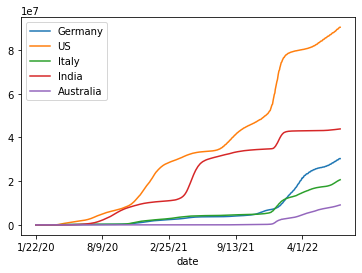

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

In [12]:
df_plot.tail()

,date,Germany,US,Italy,India,Australia
910,7/20/22,30131303,90046261,20385814,43824728,8967138
911,7/21/22,30239122,90200438,20467349,43847065,9018965
912,7/22/22,30331131,90367064,20539016,43868476,9065275
913,7/23/22,30331133,90390185,20608190,43888755,9103321
914,7/24/22,30331133,90410386,20660065,43905621,9136110


In [13]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [14]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_plot.tail()

,date,Germany,US,Italy,India,Australia
910,2022-07-20,30131303,90046261,20385814,43824728,8967138
911,2022-07-21,30239122,90200438,20467349,43847065,9018965
912,2022-07-22,30331131,90367064,20539016,43868476,9065275
913,2022-07-23,30331133,90390185,20608190,43888755,9103321
914,2022-07-24,30331133,90410386,20660065,43905621,9136110


In [18]:
df_plot.to_csv('data/processed/COVID_small_flat_table.csv',sep=';',index=False)